In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.6 MB/s eta 0:00:00


Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 130, 'height': 70, 'count': 501, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.5, 0.0, -25.0,
       0.0, -0.5, 70.0)}
Shape of the data: (70, 130)
Data type: float32


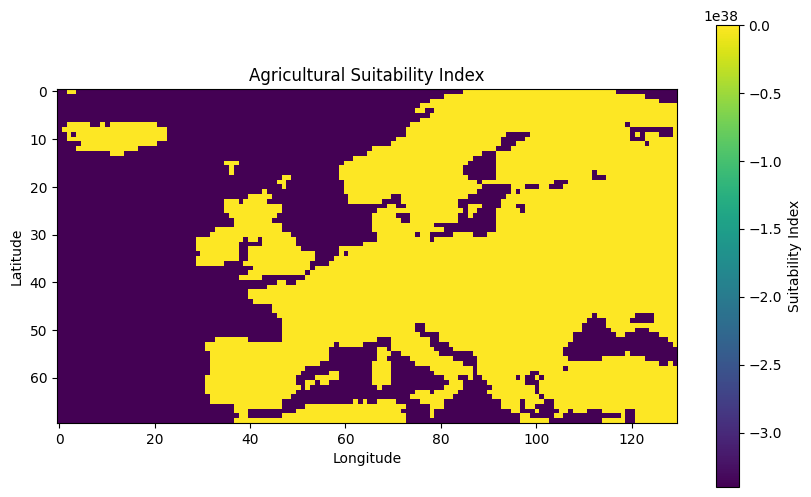


Descriptive Statistics:
        Suitability
count  9.100000e+03
mean           -inf
std             inf
min   -3.400000e+38
25%   -3.400000e+38
50%    1.722762e-03
75%    5.802127e-01
max    1.000066e+00
Percentage of missing data: 0.00%


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


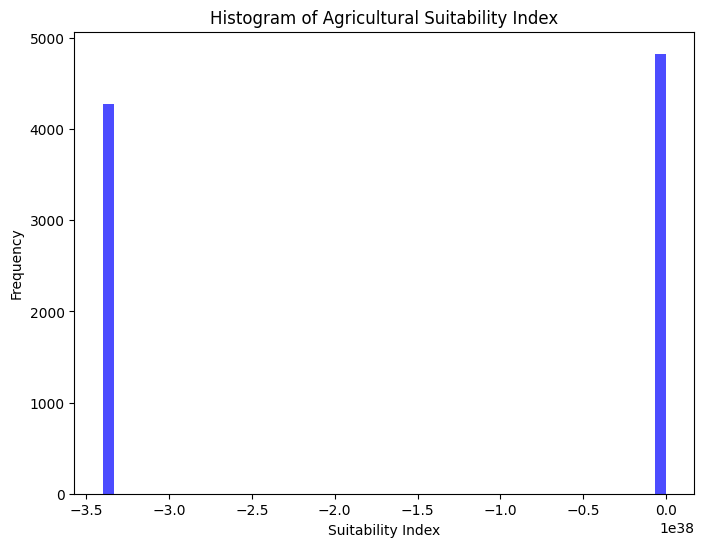

In [5]:
# Import necessary libraries
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the .tif data
data_path = 'data/suit.tif'  # Adjust path as necessary
with rasterio.open(data_path) as src:
    # Read the data (first band)
    data = src.read(1)
    # Get metadata for understanding the data
    metadata = src.meta

# 2. Basic Exploratory Data Analysis (EDA)

# 2.1 Show basic information about the data
print(f"Metadata: {metadata}")
print(f"Shape of the data: {data.shape}")
print(f"Data type: {data.dtype}")

# 2.2 Visualizing the data
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis')
plt.colorbar(label='Suitability Index')
plt.title('Agricultural Suitability Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 2.3 Descriptive statistics
# Create a DataFrame to perform basic stats
data_flat = data.flatten()  # Flattening the data for statistical analysis
data_df = pd.DataFrame(data_flat, columns=['Suitability'])

# Show basic statistics
print("\nDescriptive Statistics:")
print(data_df.describe())

# 2.4 Check for missing data
missing_data_percentage = np.sum(np.isnan(data)) / data.size * 100
print(f"Percentage of missing data: {missing_data_percentage:.2f}%")

# 2.5 Histogram of data values
plt.figure(figsize=(8, 6))
plt.hist(data_flat, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Agricultural Suitability Index')
plt.xlabel('Suitability Index')
plt.ylabel('Frequency')
plt.show()